In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("data/food.csv", delimiter="\t")

/Users/Jared/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,3,5,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.shape

(79470, 159)

In [4]:
data.columns

Index([u'code', u'url', u'creator', u'created_t', u'created_datetime',
       u'last_modified_t', u'last_modified_datetime', u'product_name',
       u'generic_name', u'quantity',
       ...
       u'caffeine_100g', u'taurine_100g', u'ph_100g',
       u'fruits-vegetables-nuts_100g', u'collagen-meat-protein-ratio_100g',
       u'cocoa_100g', u'chlorophyl_100g', u'carbon-footprint_100g',
       u'nutrition-score-fr_100g', u'nutrition-score-uk_100g'],
      dtype='object', length=159)

In [11]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000024600,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,plastique,plastique,NaN,NaN,Filet de bœuf,fr:filet-de-boeuf,fr:Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",fr:filet-de-boeuf,fr:Filet-de-boeuf,http://en.openfoodfacts.org/images/products/00...,http://en.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000027205,http://world-en.openfoodfacts.org/product/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [12]:
pd.options.display.max_columns = 20

In [6]:
nullCounts = data.isnull().sum()

In [7]:
nullCounts

code                                   19
url                                    19
creator                                69
created_t                               3
created_datetime                        7
last_modified_t                         0
last_modified_datetime                  0
product_name                         7977
generic_name                        40925
quantity                            13388
packaging                           24114
packaging_tags                      24114
brands                              11286
brands_tags                         11290
categories                          21335
categories_tags                     21352
categories_en                       21334
origins                             62698
origins_tags                        62736
manufacturing_places                54667
manufacturing_places_tags           54674
labels                              50806
labels_tags                         50760
labels_en                         

In [17]:
sortedNullCounts = nullCounts.sort_values()

In [19]:
sortedNullCounts[:60]

last_modified_t                                0
last_modified_datetime                         0
created_t                                      3
created_datetime                               7
code                                          19
url                                           19
creator                                       69
states_tags                                   92
states_en                                     92
states                                        92
countries                                    219
countries_en                                 219
countries_tags                               219
image_small_url                             4610
image_url                                   4610
product_name                                7977
brands                                     11286
brands_tags                                11290
quantity                                   13388
pnns_groups_2                              15542
pnns_groups_1       

In [23]:
data.no_nutriments.isnull().sum()

79470

In [27]:
nullRowData = data.isnull().sum(axis=1).sort_values()

In [50]:
nullRowData

15042     67
14922     71
66501     72
55360     73
48028     73
53681     74
14983     74
66481     74
38499     75
34738     75
66926     75
14984     75
34739     76
14899     76
39994     76
42306     77
34734     77
23435     77
39977     77
23406     77
66483     77
39273     77
39245     77
51908     78
15007     78
55379     78
66572     78
19401     78
23413     78
2417      79
        ... 
65766    150
65609    150
40717    150
56678    150
71854    150
6752     150
6663     150
6660     150
6659     150
6606     150
6611     150
6613     150
6621     150
6631     150
10419    150
6641     150
6642     150
6643     150
6644     150
6645     150
6646     150
6650     150
58907    150
6651     150
6652     150
6653     150
6657     150
6658     150
6604     150
6722     150
dtype: int64

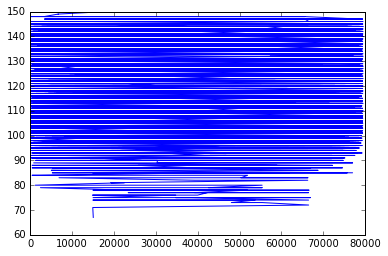

In [46]:
plt.plot(nullRowData)

In [54]:
copyData = data

In [56]:
nullRowData1 = nullRowData.reset_index(drop=True)

In [57]:
nullRowData1

0         67
1         71
2         72
3         73
4         73
5         74
6         74
7         74
8         75
9         75
10        75
11        75
12        76
13        76
14        76
15        77
16        77
17        77
18        77
19        77
20        77
21        77
22        77
23        78
24        78
25        78
26        78
27        78
28        78
29        79
        ... 
79440    150
79441    150
79442    150
79443    150
79444    150
79445    150
79446    150
79447    150
79448    150
79449    150
79450    150
79451    150
79452    150
79453    150
79454    150
79455    150
79456    150
79457    150
79458    150
79459    150
79460    150
79461    150
79462    150
79463    150
79464    150
79465    150
79466    150
79467    150
79468    150
79469    150
dtype: int64

In [61]:
type(nullRowData)

pandas.core.series.Series

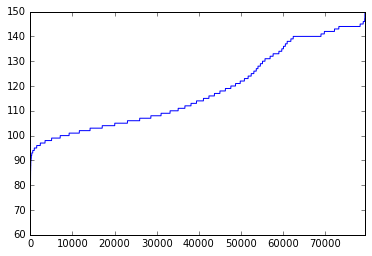

In [62]:
nullRowData1.plot()

In [100]:
dataset = nullRowData.iloc[:50000]

In [101]:
dataset

15042     67
14922     71
66501     72
55360     73
48028     73
53681     74
14983     74
66481     74
38499     75
34738     75
66926     75
14984     75
34739     76
14899     76
39994     76
42306     77
34734     77
23435     77
39977     77
23406     77
66483     77
39273     77
39245     77
51908     78
15007     78
55379     78
66572     78
19401     78
23413     78
2417      79
        ... 
58561    122
34840    122
72855    122
10585    122
65988    122
9853     122
58780    122
50825    122
5500     122
291      122
24318    122
6412     122
32695    122
6432     122
24676    122
51488    122
6437     122
68285    122
59794    122
73202    122
51367    122
24308    122
24305    122
51007    122
51006    122
10433    122
10426    122
23245    122
23238    122
33930    122
dtype: int64

In [67]:
nullRowData

15042     67
14922     71
66501     72
55360     73
48028     73
53681     74
14983     74
66481     74
38499     75
34738     75
66926     75
14984     75
34739     76
14899     76
39994     76
42306     77
34734     77
23435     77
39977     77
23406     77
66483     77
39273     77
39245     77
51908     78
15007     78
55379     78
66572     78
19401     78
23413     78
2417      79
        ... 
65766    150
65609    150
40717    150
56678    150
71854    150
6752     150
6663     150
6660     150
6659     150
6606     150
6611     150
6613     150
6621     150
6631     150
10419    150
6641     150
6642     150
6643     150
6644     150
6645     150
6646     150
6650     150
58907    150
6651     150
6652     150
6653     150
6657     150
6658     150
6604     150
6722     150
dtype: int64

In [96]:
dat = data.isnull().sum(axis=1)

In [97]:
dat

0        133
1        144
2        140
3        140
4        139
5        120
6        123
7        135
8        119
9        119
10       141
11       107
12       107
13       140
14       109
15       110
16       111
17       109
18       122
19       144
20       124
21       116
22       134
23       144
24       144
25       113
26       113
27       128
28       136
29       136
        ... 
79440    144
79441    125
79442    144
79443    140
79444    139
79445    144
79446    133
79447    140
79448    144
79449    144
79450    146
79451    140
79452    144
79453    142
79454    143
79455    140
79456    140
79457    123
79458    128
79459    113
79460    123
79461    118
79462    140
79463    144
79464    120
79465    127
79466    110
79467    143
79468    126
79469    132
dtype: int64

In [72]:
dat.iloc[1] < 100

False

In [73]:
dat.iloc[1]

144

In [102]:
dataMinusRows = data[dat<120]

In [103]:
dataMinusRows.shape

(47586, 159)

In [95]:
dat > 30

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
         ... 
79440    True
79441    True
79442    True
79443    True
79444    True
79445    True
79446    True
79447    True
79448    True
79449    True
79450    True
79451    True
79452    True
79453    True
79454    True
79455    True
79456    True
79457    True
79458    True
79459    True
79460    True
79461    True
79462    True
79463    True
79464    True
79465    True
79466    True
79467    True
79468    True
79469    True
dtype: bool

In [105]:
nullColumnData = dataMinusRows.isnull().sum(axis=0)

In [115]:
print nullColumnData.shape
print nullColumnData.head()

(159,)
code                0
url                 0
creator             1
created_t           1
created_datetime    1
dtype: int64


In [127]:
aa = nullColumnData < 5

In [128]:
print aa.shape
print aa.head()

(159,)
code                True
url                 True
creator             True
created_t           True
created_datetime    True
dtype: bool


In [134]:
nullColumnDataSorted = nullColumnData.sort_values()
print nullColumnDataSorted.shape
print nullColumnDataSorted

(159,)
code                                         0
url                                          0
last_modified_t                              0
last_modified_datetime                       0
states_tags                                  0
states                                       0
pnns_groups_2                                0
states_en                                    0
creator                                      1
created_t                                    1
created_datetime                             1
countries_tags                              25
countries_en                                25
countries                                   25
product_name                               161
brands                                     299
brands_tags                                299
quantity                                   712
image_url                                  788
image_small_url                            788
pnns_groups_1                              804
main_c

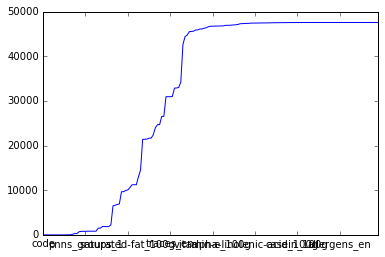

In [135]:
nullColumnDataSorted.plot()

In [136]:
dataMinusRowsAndColumns = dataMinusRows.T[nullColumnData <30000].T

In [137]:
dataMinusRowsAndColumns.shape

(47586, 58)